In [2]:
# https://medium.com/@tomar.ankur287/user-user-collaborative-filtering-recommender-system-51f568489727

import pandas as pd
import numpy as np
import math

Ratings = pd.read_csv('data/parsed_combined_data_1.txt')



In [3]:
Ratings.columns = ['movieId', 'userId', 'rating', 'timestamp']

In [4]:
len(Ratings)

24053763

In [5]:
print(len(np.unique(Ratings['userId'])))
print(len(np.unique(Ratings['movieId'])))

470758
4499


In [6]:
import statistics
ratings_per_user = Ratings.groupby('userId')['rating'].count()
statistics.mean(ratings_per_user.tolist())

51.09581356025814

<AxesSubplot:>

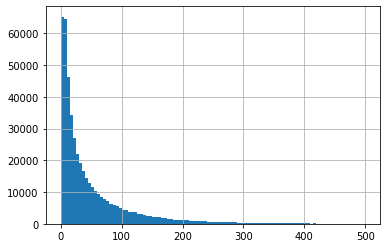

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=100, range=(0,500))

In [8]:
ratings_per_movie = Ratings.groupby('movieId')['rating'].count()
statistics.mean(ratings_per_movie.tolist())

5346.468770837964

<AxesSubplot:>

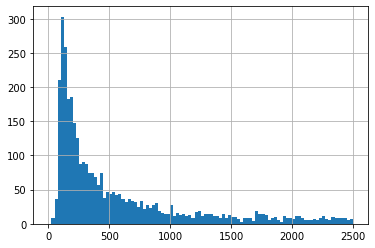

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_movie.hist(bins=100, range=(0,2500))


In [ ]:
rating_matrix = Ratings.pivot_table(index='userId', columns='movieId', values='rating')
# replace NaN values with 0
rating_matrix = rating_matrix.fillna(0)
# display the top few rows
rating_matrix.head()



In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=3):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    print(user)
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    print(other_users)
    print(cosine_similarity(user,other_users))
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    
current_user = 1046323
# try it out
similar_user_indices = similar_users(current_user, rating_matrix)
print(similar_user_indices)
#=> [30773, 39021, 45603]


Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]
Index: []

[0 rows x 4499 columns]
movieId  1     2     3     4     5     6     7     8     9     10    ...  \
userId                                                               ...   
1333      0.0   0.0   4.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
3321      3.0   0.0   0.0   0.0   4.0   0.0   0.0   1.0   0.0   0.0  ...   
3998      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5980      0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0  ...   
10268     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       

ValueError: Found array with 0 sample(s) (shape=(0, 4499)) while a minimum of 1 is required by check_pairwise_arrays.

In [1]:
current_user = 1046323
print(rating_matrix[1])
user = rating_matrix[rating_matrix.index == current_user]
user

NameError: name 'rating_matrix' is not defined